# Intro_to_R_Data_Wrangling

In R we have the capabilites to quickly disect and reshape the data and tie this to graphical outputs. This section will go over some of the basic concepts of subsetting and data manipulation and give a few examples of how to plot these outputs to get an idea about what the data looks like.

# Subsetting

Subsetting has three types of operators and six types of subsetting

Let's first look at subset operators: [, [[, $

In [3]:
# first get our our previous data frames again
my.df <- data.frame(x = 1:3, y = c('a', 'b', 'c'))
my.other.df <- data.frame(x = 5:7, y = c('x', 'y', 'z'))
my.column.combined.df <- cbind(my.df, my.other.df)

# subset operators: [, [[, $
my.df[1,]
my.df$x
my.df[[1]]

x,y
1,a


[1] 1 2 3

[1] 1 2 3

The subset types are: positive integers, negative integers, logical vectors, nothing, zero and character vectors

In [4]:
# subset types
# 1. using positive integers
my.column.combined.df[c(1,3),]

# 2. using negative integers (omitting these parts)
my.column.combined.df[c(-1,-3),]

# 3. Logical Vectors (careful with recyling)
my.column.combined.df[c(TRUE,FALSE,TRUE,FALSE),]
my.column.combined.df[c(TRUE),]

,x,y,x,y
1,1,a,5,x
3,3,c,7,z


,x,y,x,y
2,2,b,6,y


,x,y,x,y
1,1,a,5,x
3,3,c,7,z


x,y,x,y
1,a,5,x
2,b,6,y
3,c,7,z


In [5]:
# subset types continued
# 4. Nothing, used especially with matrices, arrays and data frames
my.column.combined.df[c(1,3),]

# 5. Zero, returns 0-length vector. Mainly used in generating test data (output is: numeric(0))
my.column.combined.df[0] # will not display in a notebook

# 6. Character vectors, if names are present
my.df['x']

,x,y,x,y
1,1,a,5,x
3,3,c,7,z


1
2
3

x
1
2
3


One of the most widely used subsetting types used is logical subsetting. Given a provided condition elements can be extracted

In [6]:
# want to extract rows where column x is greater or equal to two (2)
my.df[my.df$x >= 2, ]
# What actually happens is your condition creates a logical vector which is used for extracion
my.df$x >= 2

,x,y
2,2,b
3,3,c


[1] FALSE  TRUE  TRUE

In [7]:
# it is also possible to provide multiple conditions
my.df[my.df$x >= 2 & my.df$y == 'c', ]

,x,y
3,3,c


In [8]:
# is whe have a regular vector whe use the command 'which' to do the exact same
some.vector <- c(1:10)
some.vector[which(some.vector > 8)]

[1]  9 10

# Things to be careful about

When combining data frames the type acorss columns have to be the same (combining atomic vectors)

In [10]:
my.different.df <- data.frame(x = c('x', 'y', 'z'), y = 5:7)

# combining by column works as long as dimentions match up
my.new.col.combination.df <- cbind(my.df, my.different.df)
my.new.col.combination.df

# combining by row will cause an error
my.new.row.combination.df <- rbind(my.df, my.different.df)

x,y,x,y
1,a,x,5
2,b,y,6
3,c,z,7


Warning message in `[<-.factor`(`*tmp*`, ri, value = 5:7):
"invalid factor level, NA generated"

In [11]:
# trying to row-combine data frames with different column names also won't work
colnames(my.other.df)
colnames(my.other.df) <- c('x2', 'y2')
rbind(my.df, my.other.df) # will give an error

[1] "x" "y"

ERROR: Error in match.names(clabs, names(xi)): names do not match previous names


If working in a notebook factors are not displayed as such (it will do so in an interactive R session)

In [12]:
# each of the strings in column 'y' is actually a factor
my.df[1,2]
class(my.df[1,2])

[1] a
Levels: a b c

[1] "factor"

While the above does not seem particularly concerning it can create headaches when plotting or using functions which use factors. Workarounds are to retroactively change the class or to not have factors to begin with

In [13]:
# 1. change in retrospect
# create copy of my.df to demonstrat differences
my.changed.df <- my.df
my.changed.df$y <- as.character(my.changed.df$y)
class(my.changed.df[1,2])

# 2. avoid having fators from the start
my.nonFactor.df <- data.frame(x = 1:3, y = c('a', 'b', 'c'), stringsAsFactors = FALSE)
class(my.nonFactor.df[1,2])

[1] "character"

[1] "character"

# Sanity checks and quick plotting

Whenever we get data we want to be able to quickly assess the situation; does our data make sense?

Let's do this with the counts you generated in your homework. First, take a minute and think about what you would expect (number of genes, number of replicates etc.)

In [15]:
# reading in data
counts <- read.csv('/home/ucsd-train40/cmm262/deseq2/tardbp_counts_for_deseq2.csv', header=TRUE,
                  stringsAsFactors = FALSE)

# check type
typeof(counts)

#check dimensions
dim(counts)

# check first few lines
head(counts)

[1] "list"

[1] 16582     5

Geneid,NT_shRNA_hepg2_Rep1,NT_shRNA_hepg2_Rep2,TARDBP_shRNA_hepg2_Rep1,TARDBP_shRNA_hepg2_Rep2
ENSG00000227232.4,61,92,69,58
ENSG00000237683.5,23,21,17,28
ENSG00000239906.1,11,2,5,7
ENSG00000241860.2,26,32,35,35
ENSG00000228463.4,77,69,63,66
ENSG00000237094.7,38,44,45,41


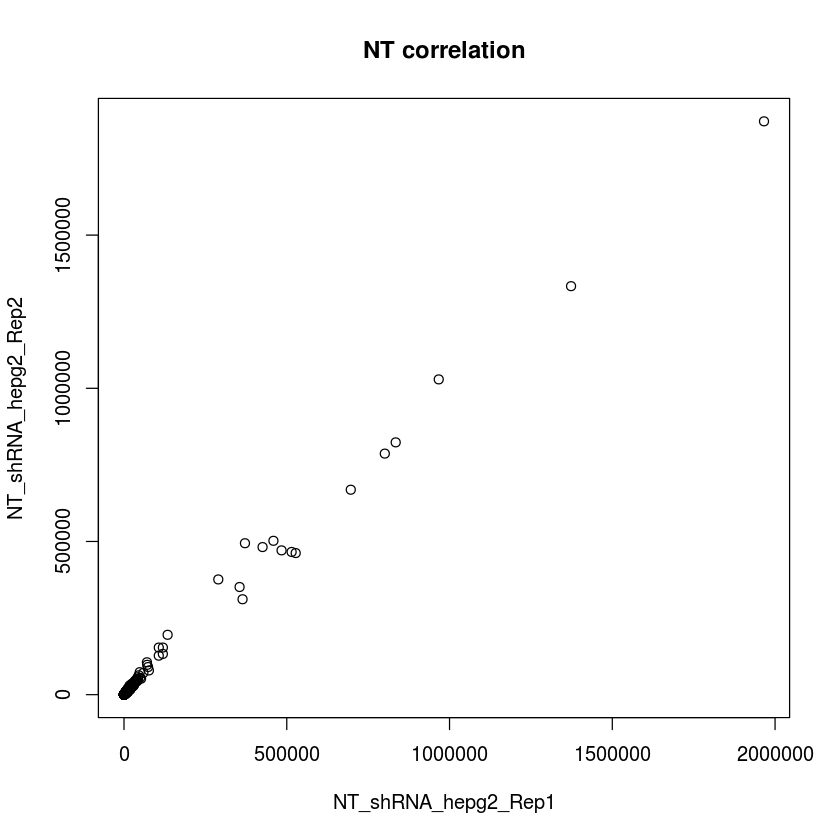

In [16]:
# checking correlation between replicates and across experiments
plot(x = counts$NT_shRNA_hepg2_Rep1, y = counts$NT_shRNA_hepg2_Rep2, main = 'NT correlation', 
     xlab = 'NT_shRNA_hepg2_Rep1', ylab = 'NT_shRNA_hepg2_Rep2')

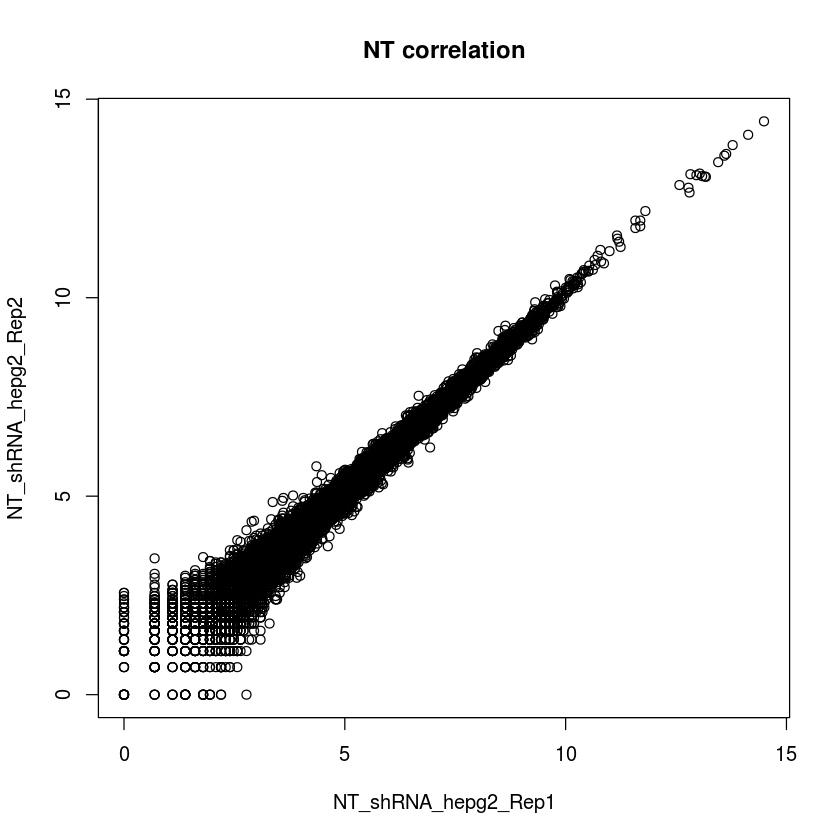

In [17]:
# the above is not too informative so instead plot on a log-scale (log() coresponds to the natural log in R)
plot(x = log(counts$NT_shRNA_hepg2_Rep1), y = log(counts$NT_shRNA_hepg2_Rep2), main = 'NT correlation', 
     xlab = 'NT_shRNA_hepg2_Rep1', ylab = 'NT_shRNA_hepg2_Rep2')

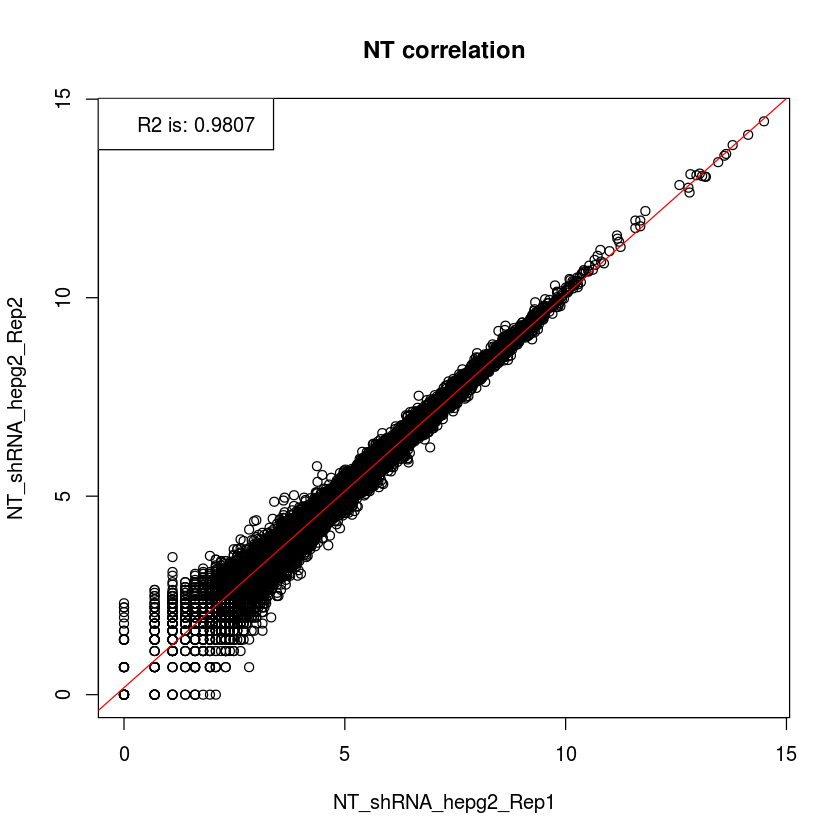

In [31]:
# the above is already much better, but we would now like to quantify how closely they resemble one another
# to do so we use the 'r-squared' metric (goodness of fit measure between 0 and 1)
# because we are trying to determine a linear relationship we use a linear model: lm(Y ~ X)
# since we are working in log-space we might have to add a pseudo-count

# summary(log(counts$NT_shRNA_hepg2_Rep1))
# fit <- lm(log(counts$NT_shRNA_hepg2_Rep2) ~ log(counts$NT_shRNA_hepg2_Rep1))
fit <- lm(log(counts$NT_shRNA_hepg2_Rep2 + 1) ~ log(counts$NT_shRNA_hepg2_Rep1 + 1))
plot(x = log(counts$NT_shRNA_hepg2_Rep1 + 1), y = log(counts$NT_shRNA_hepg2_Rep2 + 1), main = 'NT correlation', 
     xlab = 'NT_shRNA_hepg2_Rep1', ylab = 'NT_shRNA_hepg2_Rep2')
abline(fit, col = 'red')
legend('topleft', legend = paste('R2 is:', format(summary(fit)$adj.r.squared, digits = 4)))

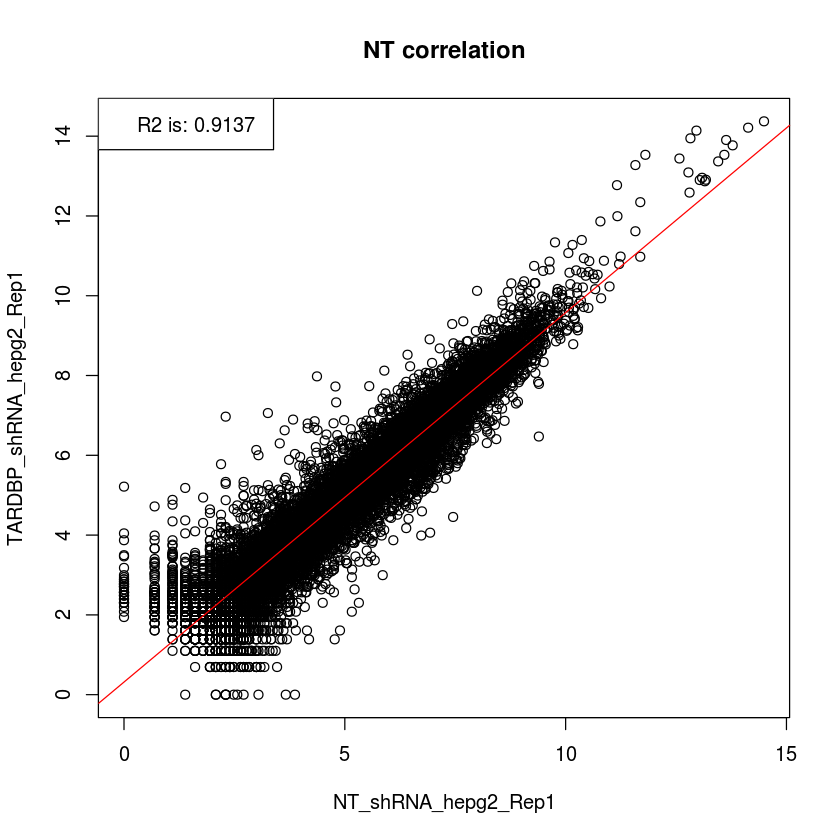

In [33]:
# Now let's compare across experiments (what do we expect?)
fit2 <- lm(log(counts$TARDBP_shRNA_hepg2_Rep1 + 1) ~ log(counts$NT_shRNA_hepg2_Rep1 + 1))
plot(x = log(counts$NT_shRNA_hepg2_Rep1 + 1), y = log(counts$TARDBP_shRNA_hepg2_Rep1 + 1), main = 'NT correlation', 
     xlab = 'NT_shRNA_hepg2_Rep1', ylab = 'TARDBP_shRNA_hepg2_Rep1')
abline(fit2, col = 'red')
legend('topleft', legend = paste('R2 is:', format(summary(fit2)$adj.r.squared, digits = 4)))

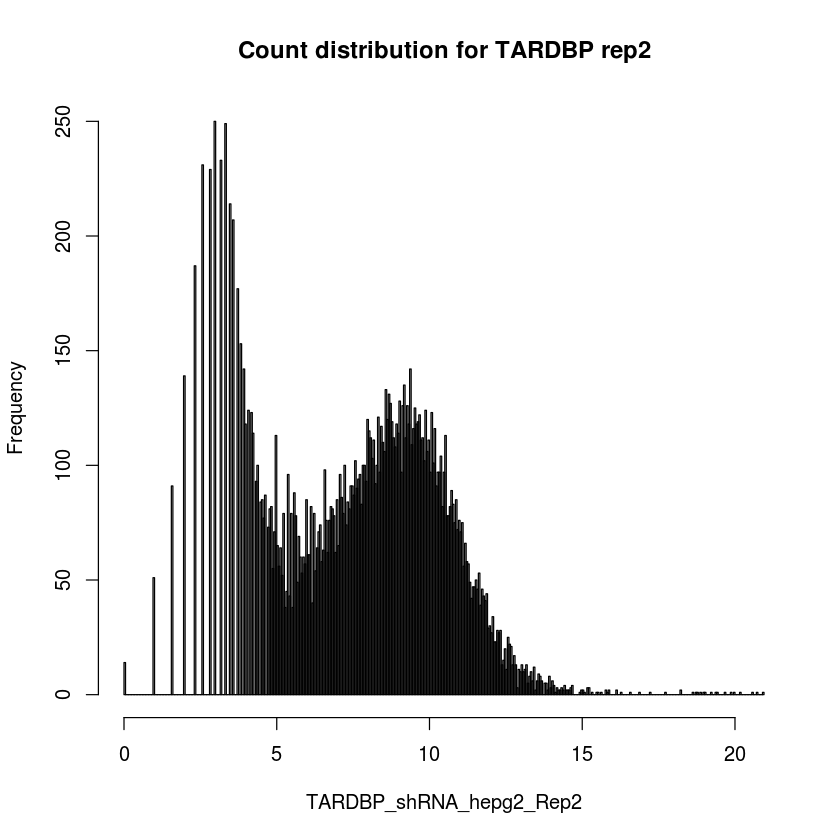

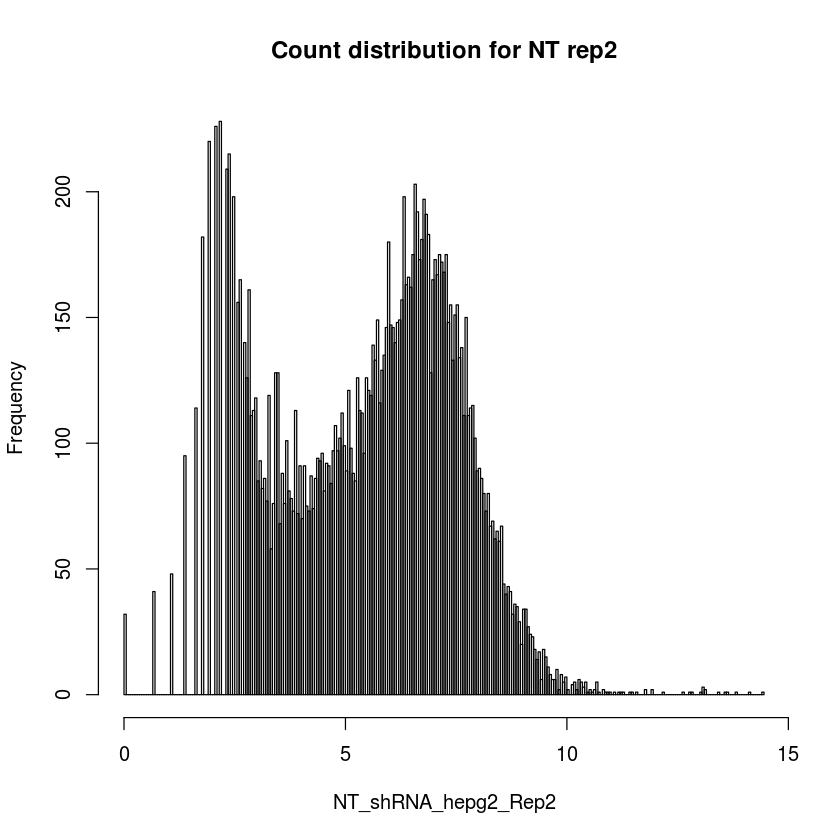

In [39]:
# we can also look at the distribution of the counts themselves by using a histogram
hist(log(counts$TARDBP_shRNA_hepg2_Rep2 + 1), main = 'Count distribution for TARDBP rep2', 
     xlab = 'TARDBP_shRNA_hepg2_Rep2', ylab = 'Frequency', breaks = 500)
hist(log(counts$NT_shRNA_hepg2_Rep2 + 1), main = 'Count distribution for NT rep2', 
     xlab = 'NT_shRNA_hepg2_Rep2', ylab = 'Frequency', breaks = 500)

Let's see what the general features are of counts across all samples:

In [47]:
summary(rowSums(counts[,c(2:5)]))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     21     148    1144    7091    3914 7539335 

For a gene having a combined count of over 7 mio. seems a bit high. How many such high-count cases are there?

In [48]:
high.count <- 500000
length(which(rowSums(counts[,c(2:5)]) > high.count))

[1] 19

In [50]:
# how would you remove these rows?

filtered.counts <- c()
filtered.counts <- counts[-which(rowSums(counts[,c(2:5)]) > high.count),]
dim(counts)
dim(filtered.counts)

[1] 16582     5

[1] 16563     5

In [56]:
length(which(counts$Geneid == 'ENST00000456328.2'))
length(which(counts$Geneid == 'ENSG00000223972.4'))
counts$Geneid[1:5]
length(which(counts$Geneid == 'ENST00000462488.1'))

[1] 0

[1] 0

[1] "ENSG00000227232.4" "ENSG00000237683.5" "ENSG00000239906.1"
[4] "ENSG00000241860.2" "ENSG00000228463.4"

[1] 0

Assuming the above was our last filtering step and every subsequent analysis performed would be using 'filtered.counts' we want to save the dataframe.

There are different options for saving data but we will use a built in function to store our data as a .csv file

In [ ]:
# we specifically set row.names to false. See what happens if you omit this flag
# reason out why I've chosen to save it this way 
write.csv(filtered.counts, file = 'example_filtered_counts.csv', row.names = FALSE)

Maybe we also want to show our PI how nice our replicates look so let's save the correlation plot of the filtered data

In [51]:
# 1. specify to save in desired format
# 2. plot desired figure
# 3. secify that plotting is done
pdf('my_great_experiment.pdf')

fit <- lm(log(counts$NT_shRNA_hepg2_Rep2 + 1) ~ log(counts$NT_shRNA_hepg2_Rep1 + 1))
plot(x = log(counts$NT_shRNA_hepg2_Rep1 + 1), y = log(counts$NT_shRNA_hepg2_Rep2 + 1), main = 'NT correlation', 
     xlab = 'NT_shRNA_hepg2_Rep1', ylab = 'NT_shRNA_hepg2_Rep2')
abline(fit, col = 'red')
legend('topleft', legend = paste('R2 is:', format(summary(fit)$adj.r.squared, digits = 4)))

dev.off()

png 
  2